# CodeAlong: From Distributions to Hypotheses

## Learning Objectives

- To be able to use probability density functions to calculate probability of specific values.

- To identify normally distributed features.
- To perform a hypothesis test to compare numeric data between 2 groups.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

## Exploring Distributions 

Dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
## read in the Data/student/student-mat.csv (it uses ";" as the sep)
df = pd.read_csv('Data/student/student-mat.csv', sep =';')
# display info and .head
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
## Calculate an Avg Grade column by averaging G1, G2,G3, 
# then divide by 20, and * 100 (to make %'s')
df['avg grade'] = df[['G1','G2','G3']].mean(axis=1)/20*100

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,28.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,26.666667
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,41.666667
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,73.333333
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,43.333333


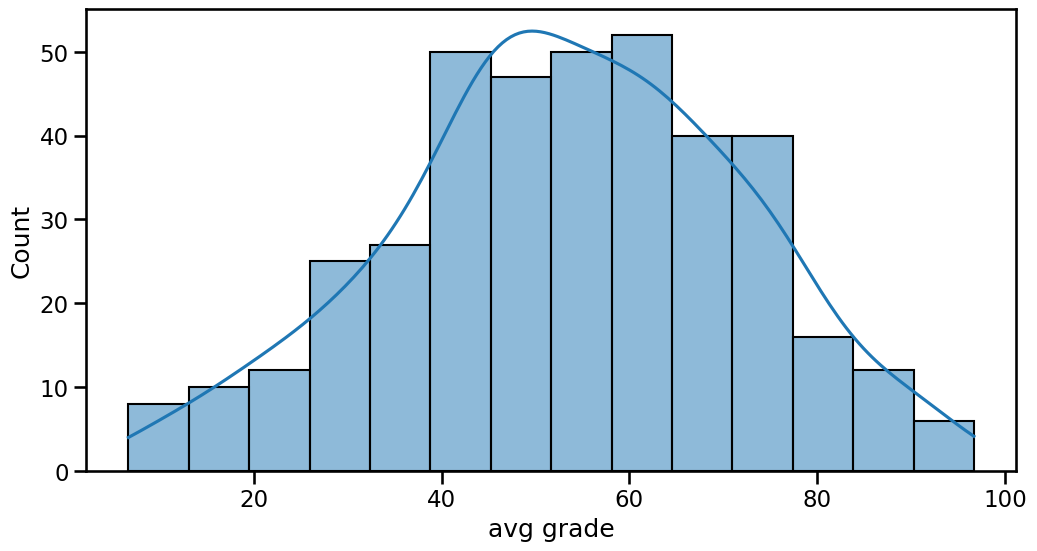

In [6]:
## plot the distribution of Avg Grade 
sns.histplot(data= df, x= 'avg grade', kde = True);

> Is it normally distributed?

In [7]:
## use scipy's normaltest
stats.normaltest(df['avg grade'])

NormaltestResult(statistic=3.692867619196469, pvalue=0.15779890502520094)

- We have our p-value for our normaltest, but what does it mean??
    - Check the docstring for the normaltest to find out the null hypothesis of the test.

### Calculating Probabilities with Scipy's  Probability Density Functions

In [10]:
## Get the mean, std, min, and max for the Avg Grade column
dist_stat = df['avg grade'].agg(['mean', 'std', 'min', 'max'])
dist_stat

mean    53.396624
std     18.483928
min      6.666667
max     96.666667
Name: avg grade, dtype: float64

In [11]:
df['avg grade'].describe()

count    395.000000
mean      53.396624
std       18.483928
min        6.666667
25%       41.666667
50%       53.333333
75%       66.666667
max       96.666667
Name: avg grade, dtype: float64

In [12]:
## generate a linearly-spaced array of values that span the min to the max
xs = np.linspace(dist_stat.loc['min'], dist_stat.loc['max'])
xs

array([ 6.66666667,  8.50340136, 10.34013605, 12.17687075, 14.01360544,
       15.85034014, 17.68707483, 19.52380952, 21.36054422, 23.19727891,
       25.03401361, 26.8707483 , 28.70748299, 30.54421769, 32.38095238,
       34.21768707, 36.05442177, 37.89115646, 39.72789116, 41.56462585,
       43.40136054, 45.23809524, 47.07482993, 48.91156463, 50.74829932,
       52.58503401, 54.42176871, 56.2585034 , 58.0952381 , 59.93197279,
       61.76870748, 63.60544218, 65.44217687, 67.27891156, 69.11564626,
       70.95238095, 72.78911565, 74.62585034, 76.46258503, 78.29931973,
       80.13605442, 81.97278912, 83.80952381, 85.6462585 , 87.4829932 ,
       89.31972789, 91.15646259, 92.99319728, 94.82993197, 96.66666667])

Probability Density Function (PDF) describes the likelihood of a continuous random variable to take on a particular value. For a normal distribution, this function is characterized by its mean (μ) and standard deviation (σ), which define the distribution's center and spread, respectively.

Imagine you have a continuous random variable, like the height of people in a city. The PDF tells you how likely it is to randomly select a person of a certain height from this city.

a continuous random variable can take on any value within a range. For example, height can be 170.5 cm, 170.51 cm, and so on—any value in a range is possible.

In [13]:
## use stats.norm.pdf to get the PDF curve that corresponds to your distribution's values
pdf = stats.norm.pdf(xs, loc = dist_stat.loc['mean'], scale = dist_stat.loc['std'])
pdf

array([0.00088353, 0.00113026, 0.0014317 , 0.0017957 , 0.00223011,
       0.00274241, 0.00333926, 0.00402605, 0.0048064 , 0.00568162,
       0.00665023, 0.00770748, 0.00884504, 0.01005075, 0.01130861,
       0.01259887, 0.01389843, 0.01518139, 0.01641984, 0.01758482,
       0.01864741, 0.01957992, 0.02035706, 0.02095708, 0.0213628 ,
       0.0215624 , 0.02155003, 0.02132604, 0.02089702, 0.02027542,
       0.01947903, 0.01853004, 0.01745408, 0.01627906, 0.01503396,
       0.01374767, 0.01244791, 0.01116029, 0.00990755, 0.00870901,
       0.00758023, 0.00653293, 0.00557501, 0.0047108 , 0.00394144,
       0.00326533, 0.00267862, 0.00217574, 0.00174991, 0.00139359])

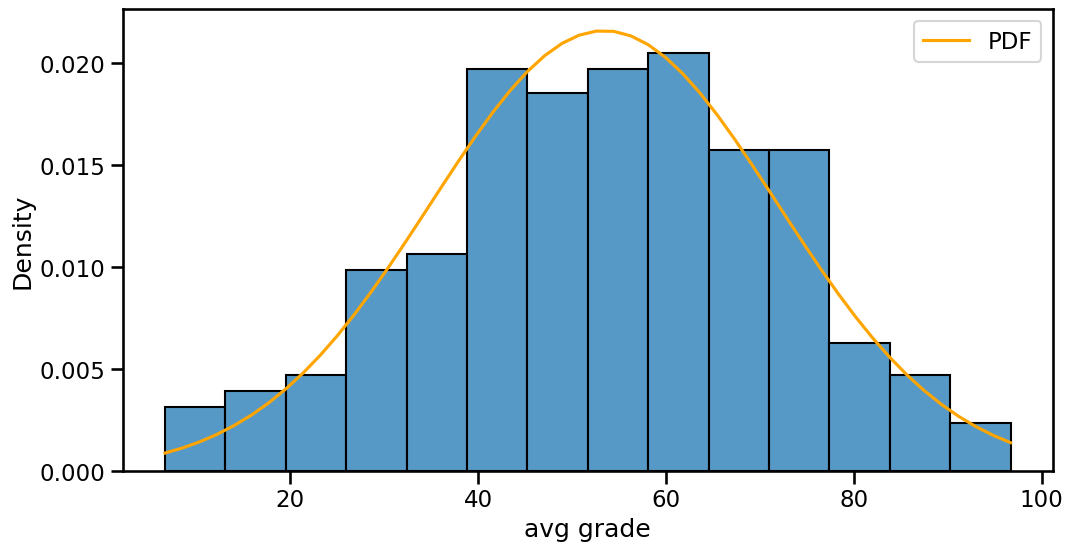

In [53]:
## Plot the histogram again AND then plot the pdf we calculated.
sns.histplot(data = df, x = 'avg grade', stat = 'density')
plt.plot(xs, pdf, color = 'orange', label = 'PDF')
plt.legend();

> Looks pretty normal! But can we confirm for a fact that its normal?

### Q1: what is the probability of a student getting a score of 90 or above?

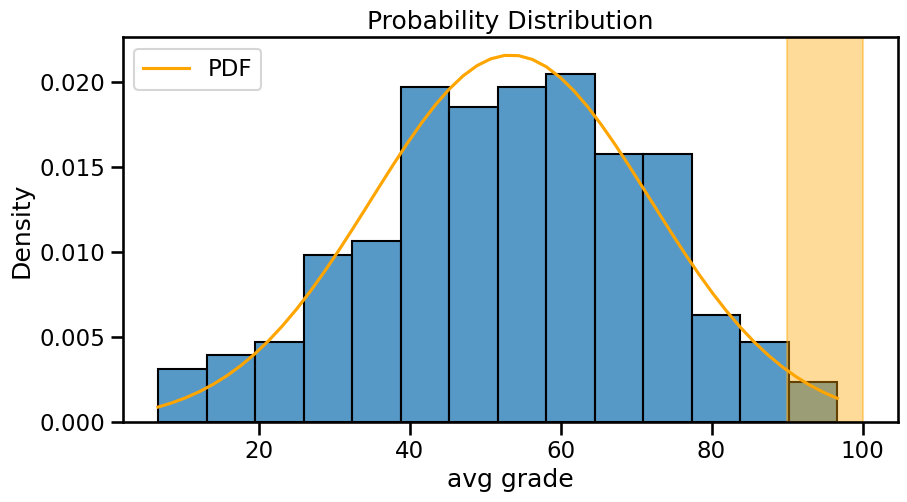

In [52]:
## Plot the histogram again AND pdf again
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df, x = 'avg grade', stat = 'density')
plt.plot(xs, pdf, color = 'orange', label = 'PDF')
ax.set_title('Probability Distribution')

## Add a vpsan to the plot showing the region we want to calc prob for
plt.axvspan(90, 100, alpha = 0.4, color = 'orange', zorder = 1)
# zorder = 1, 2, 3 (foreground, midground, background)

plt.legend();

> How can we calculate this probability? Can we use the PDF?

In [29]:
## try making a list of values from 90-100 and getting the pdf values
over_90 = list(range(90, 101))
over_90_pdf = stats.norm.pdf(over_90, loc = dist_stat.loc['mean'], scale = dist_stat.loc['std'])

## Sum the values to get the total probability. 
over_90_pdf.sum()

0.01997503750789124

> Whats the flaw to this approach?

The result 0.01997503750789124 does not directly represent the probability of the variable falling within the 90 to 100 range in the way probabilities are typically understood (as a straightforward chance of an event occurring).

Density, Not Probability: The sum of PDF values for discrete points in this context is more accurately described as a sum of densities, not a direct probability. These densities give us an idea of how "concentrated" the variable's values are around those points, relative to the mean and standard deviation of the distribution.

in business:

Continuous Nature of Sales: Just like the smooth slide, your jollibee rice sales don't just jump from one number to another in a simple pattern (like selling exactly 10, 20, or 30 cups). Instead, sales can vary continuously (you might sell 10 cups one day, 10.5 the next, or even 10.1 think extra rice). This is because the number of rice sold can take on any value within a range, not just whole numbers.

Predicting Sales (Density vs. Probability): When you use a special kind of prediction tool (like the PDF in our earlier example), it doesn't directly tell you the probability of selling exactly 20 cups oricede on a given day. Instead, it gives you a "density" at that point. Think of this density as indicating how closely packed your potential sales are around 20 cups. A higher density means it's a more common sales figure in your data, but it doesn't tell you the exact chance of selling exactly 20 cup

The Right Approach - Looking at the Big Picture: To properly understand your chances of selling a certain number of cups, you need to consider the entire range from 20 to 30 cups as a whole. This is like looking at a broader trend in your sales data to see how likely it is to sell within that range, rather than focusing on the specific likelihood of each individual number of cups sold.

Probability refers to the chance or likelihood that an event will occur. In our business context, it might be the chance of selling a certain range of cups of rice in a day.

Density tells us where on our scale (number of cups sold) we are more likely to see more activity or more common sales figures. Higher density means a higher concentration of sales data around that point, indicating it's a more common outcome.s.

> Now, we want the opposite probability, probability of being GREATER Than 90.


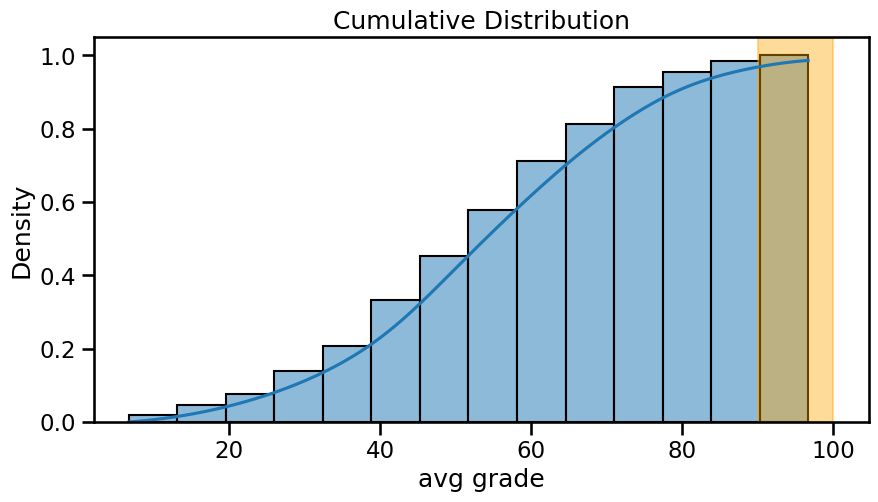

In [30]:
# calc 1-prob of 90 or lower.
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df, x = 'avg grade', stat = 'density', kde = True, cumulative = True)
ax.set_title('Cumulative Distribution')
plt.axvspan(90, 100, alpha = 0.4, color = 'orange', zorder = 1);
plt.show();

In [32]:
p_below_90 = stats.norm.cdf(90, loc = dist_stat.loc['mean'], scale = dist_stat.loc['std'])
p_below_90

0.9761640301834819

0.9761640301834819 means that, according to the normal distribution model based on the dataset's average grades, approximately 97.6% of the grades are expected to be 90 or lower. This is a way to quantify how common or uncommon it is to score above 90 based on the historical data represented in df.

In [33]:
# calc 1-prob of 90 or lower.
1 - p_below_90

0.023835969816518143

0.023835969816518143 means that approximately 2.38% of the grades are above 90. This value gives you an idea of how rare or uncommon it is to score above 90, according to the distribution of grades represented in your dataset. It's a useful figure for understanding the distribution of exceptional scores within the group you're analyzing.

- Answer: there is a 2.4% chance of having a score greater than 90.

# Hypothesis Testing

## Q: Do students with internet access have different average grades than students who do not have internet access?

### State The Hypothesis 

- $H_0$ (Null Hypothesis): Students with internet access have the same average grades as students who do not. 
- $H_A$ (Alternative Hypothesis): Students with internet access have significantly different average grades compared to students who do not. 

### Visualize and Separate Groups

- Visualize the histogram of Avg Grade again, but separate it into groups based on the "internet" column.
- Note: when comparing 2 groups with seaborn's histplot, you will want to add `common_norm=False`

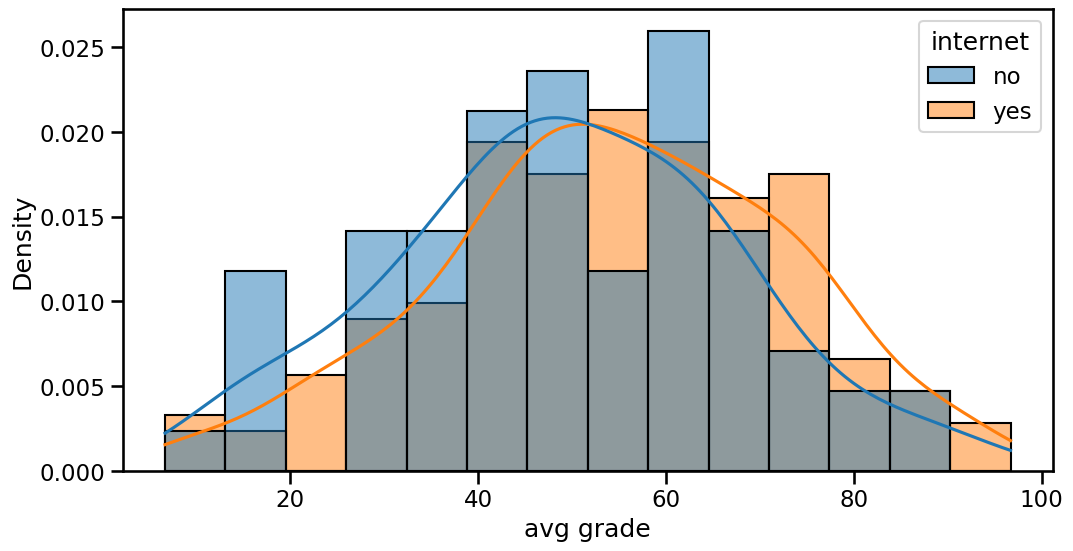

In [35]:
## visualize the histobram of Avg Grade again, but separate it by "internet"
sns.histplot(data=df, x='avg grade', hue='internet',common_norm=False, 
             stat='density',kde=True);

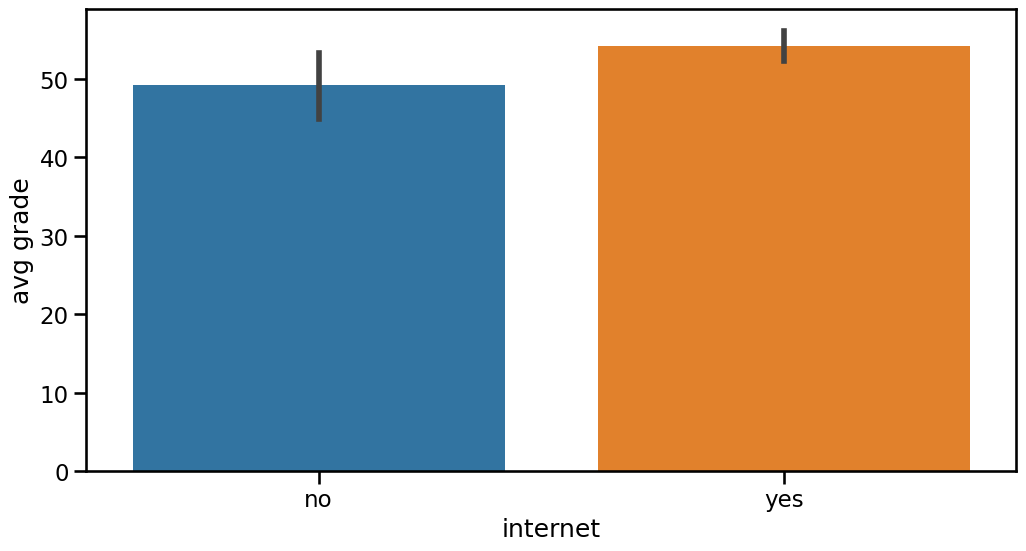

In [37]:
## Plot a bar plot of the Avg Grade for students with internet vs those that do not have it
sns.barplot(data=df, y='avg grade', x='internet',);

In [38]:
## Separate the 2 groups into 2 varaibles
grp_yes = df.loc[ df['internet']=='yes','avg grade']
grp_yes
grp_no = df.loc[ df['internet']!='yes','avg grade']
grp_no

0      28.333333
4      43.333333
7      28.333333
17     46.666667
35     35.000000
         ...    
384    26.666667
385    48.333333
389    18.333333
390    45.000000
392    41.666667
Name: avg grade, Length: 66, dtype: float64

### T-Test Assumptions

- Since we are comparing a numeric measurement between 2 groups, we want to run a 2-sample (AKA independent T-test).

- The Assumptions are:
    - No significant outliers
    - Normality 
    - Equal Variance 

#### Assumption: No Sig. Outliers

In [41]:
## check yes group for outliers using z-score >3 rule.
idx_outliers_yes = np.abs(stats.zscore(grp_yes)) > 3
idx_outliers_yes.sum()

0

In [42]:
## check no group for outliers using z-score >3 rule.
idx_outliers_no = np.abs(stats.zscore(grp_no)) > 3
idx_outliers_no.sum()

0

> No outliers to worry about! Assumption met.

#### Assumption: Normally Distributed Groups

In [43]:
## use normaltest to check if yes group is normally distributed
stats.normaltest(grp_no)

NormaltestResult(statistic=0.06502710934182387, pvalue=0.9680093286944897)

In [44]:
## use normaltest to check if no group is normally distributed
stats.normaltest(grp_yes)

NormaltestResult(statistic=3.4085586553603364, pvalue=0.18190343171736956)

>- Did we meet the assumption of normality?

#### Assumption: Equal Variance

In [45]:
## use Levene's test to check if groups have equal variance
stats.levene(grp_no, grp_yes)

LeveneResult(statistic=0.3707133150040495, pvalue=0.5429674805292047)

> Did we meet the assumption of equal variance?

### Perform Final Hypothesis Test (T-Test)

- Since we met all of the assumptions for the test we can proceed with our t-test.
    - Next class we will discuss what we would do if we did NOT meet the assumptions.

In [46]:
## run stats.ttest_ind on the 2 groups
stats.ttest_ind(grp_no, grp_yes)

Ttest_indResult(statistic=-2.0453222000574023, pvalue=0.041488533105366335)

> What is our p-value? Is it less than our alpha of .05? What does this mean?

>Our T-Test returned a p-value of `____`. Since p `</>`.05, we `can reject/fail to reject` the null hypothesis that students with internet access have the same average grades as students who do not. 

We therefore conclude that there `is/is not` a significant difference in Average Grades between students who do/do not have internet access.

Our visualization below shows that students with internet access have `HIGHER/LOWER/EQUAL` average grades.

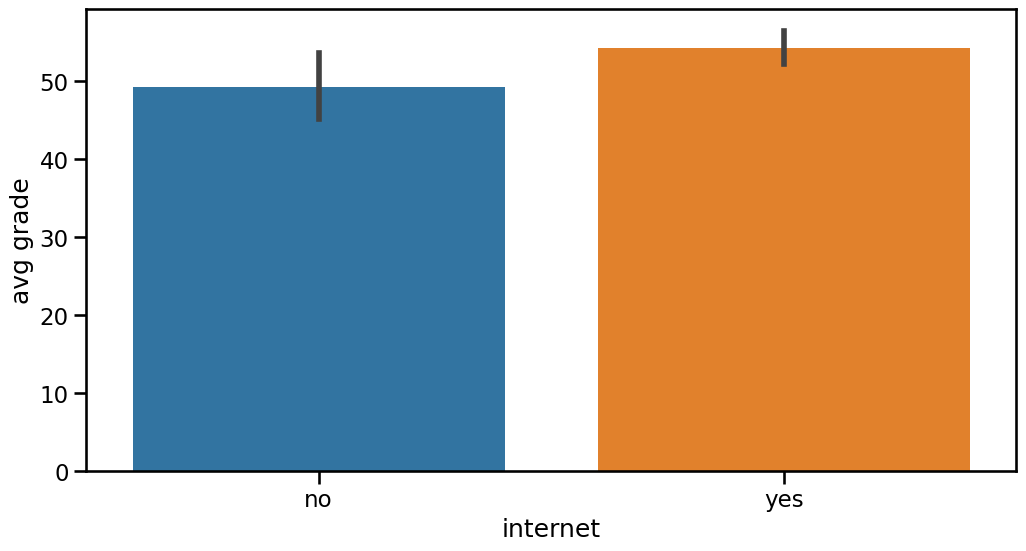

In [48]:
## Add a summary visual to support our results.
sns.barplot(data=df, x='internet',y='avg grade');

# Challenge : What is the probability of a student getting a score of less than 30 ?

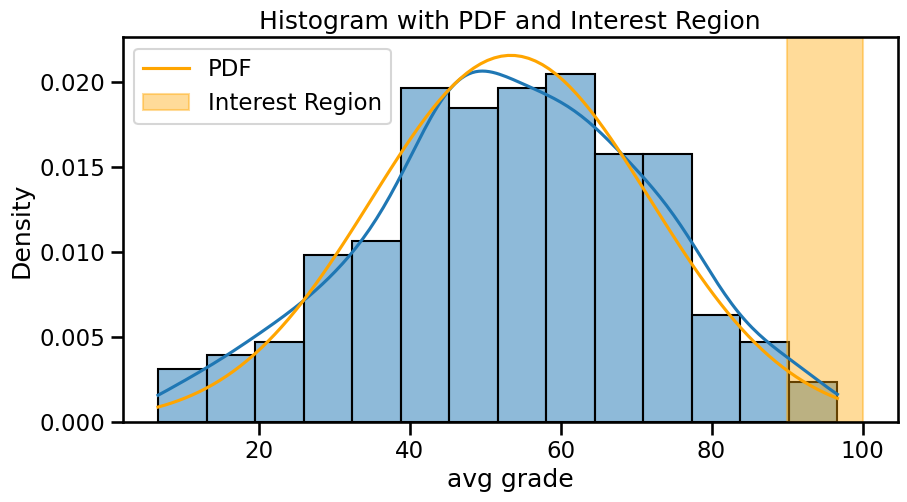

In [56]:
# import norm
from scipy.stats import norm

## Plot the histogram again AND pdf again
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df, x = 'avg grade', stat = 'density', kde = True, ax = ax)
x_values = np.linspace(min(df['avg grade']), max(df['avg grade']), 100)
pdf_values = norm.pdf(x_values, loc = dist_stat.loc['mean'], scale = dist_stat.loc['std'])
ax.plot(x_values, pdf_values, label = 'PDF', color = 'orange');

## Add a vpsan to the plot showing the region we want to calc prob for
ax.axvspan(90, 100, alpha = 0.4, color = 'orange', label = 'Interest Region')
ax.set_title('Histogram with PDF and Interest Region')
ax.legend()

plt.show();

> How can we calculate this probability? Can we use the PDF  ?

In [58]:
## try making a list of values less than 30 and getting the pdf values
p_less_30 = list(range(30))
p_less_30_pdf = stats.norm.pdf(30, loc = dist_stat.loc['mean'], scale = dist_stat.loc['std'])

## Sum the values to get the total probability. 
p_less_30_pdf.sum()

0.00968727376390968

OR

In [62]:
## Use the cumulative density function to find prob of 30 OR lower.
cdf_30 = stats.norm.cdf(30, loc = dist_stat.loc['mean'], scale = dist_stat.loc['std'])
cdf_30

0.10279556178477078

cdf_30 = 0.10279556178477078: This value means that the probability of the variable (such as 'avg grade') being 30 or lower is approximately 10.28%. In practical terms, if you're looking at grades, for example, this tells you that about 10.28% of the grades are expected to be 30 or lower based on the normal distribution defined by your data's mean and standard deviation.

- Answer:

In [64]:
1 - cdf_30

0.8972044382152292

1 - cdf_30 = 0.8972044382152292: This calculation gives us the complement of the CDF value, which represents the probability of the variable being greater than 30. The result, approximately 89.72%, indicates that a vast majority, or about 89.72% of the grades, are expected to be above 30.

**Interpretation:**

The relatively low CDF value (around 10.28%) for 30 or lower suggests that scoring 30 or below is relatively uncommon or less likely in the context of your dataset's distribution.
Conversely, the high value (around 89.72%) for scores above 30 indicates that most of the observations (grades, in this case) fall above this threshold, highlighting that higher scores are much more common than lower scores up to 30.